In [1]:
import requests
import zipfile
import os

# URL of the dataset
url = 'https://www.dropbox.com/scl/fi/u2w4eoeiksyae1pn0di6d/IndianSignLanguage.zip?rlkey=38ztp9zkqvhdvusoeet3a9qex&dl=1'  # Set dl=1 to download directly

# Download the file
response = requests.get(url)
zip_path = 'IndianSignLanguage.zip'

# Save the ZIP file
with open(zip_path, 'wb') as f:
    f.write(response.content)

print("Dataset downloaded successfully.")

# Extract the ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('IndianSignLanguage')

print("Dataset extracted successfully.")


Dataset downloaded successfully.
Dataset extracted successfully.


Metadata Summary:
Total number of images: 42000
Number of classes: 35
Class distribution:
   ClassID  NumImages
0        O       1200
1        I       1200
2        5       1200
3        P       1200
4        R       1200
5        A       1200
6        C       1200
7        Z       1200
8        K       1200
9        3       1200
10       W       1200
11       M       1200
12       G       1200
13       U       1200
14       Y       1200
15       4       1200
16       S       1200
17       Q       1200
18       D       1200
19       1       1200
20       B       1200
21       T       1200
22       6       1200
23       H       1200
24       F       1200
25       E       1200
26       7       1200
27       9       1200
28       X       1200
29       N       1200
30       V       1200
31       2       1200
32       J       1200
33       8       1200
34       L       1200



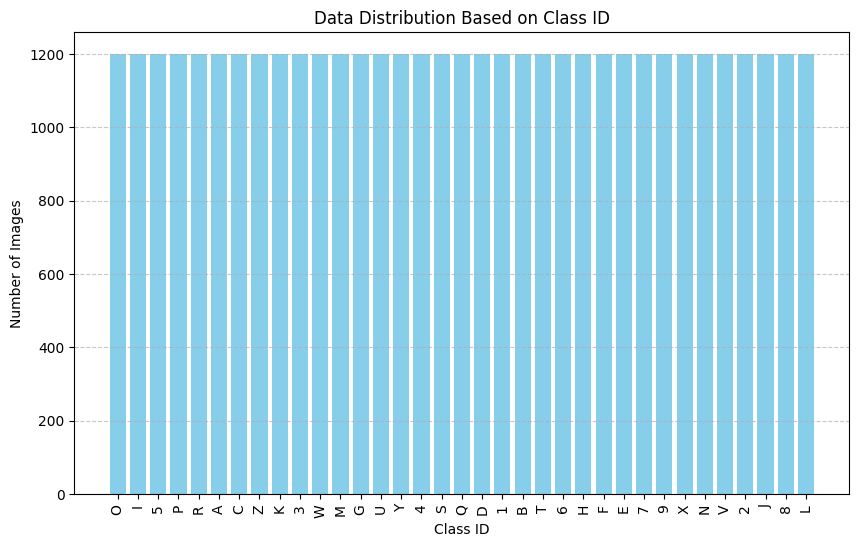

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Function to load the dataset and extract metadata
def extract_metadata(dataset_path):
    data = []
    class_distribution = {}

    # Loop through each class directory
    for class_dir in os.listdir(dataset_path):
        # Skip hidden files or directories (e.g., .DS_Store on macOS)
        if class_dir.startswith('.'):
            continue

        # Use the directory name as the class label (no conversion to int)
        class_id = class_dir
        class_images = os.listdir(os.path.join(dataset_path, class_dir))

        # Count the number of images in the class directory
        class_distribution[class_id] = len(class_images)
        data.append((class_id, len(class_images)))

    # Convert data to DataFrame for easier manipulation and visualization
    df = pd.DataFrame(data, columns=['ClassID', 'NumImages'])

    # Calculate total number of images
    total_images = df['NumImages'].sum()

    # Display metadata
    print("Metadata Summary:")
    print("=================")
    print("Total number of images:", total_images)
    print("Number of classes:", len(df))
    print("Class distribution:")
    print(df)
    print("")

    return df, class_distribution

# Path to the dataset
dataset_path = "IndianSignLanguage/data"

# Extract metadata
metadata_df, class_distribution = extract_metadata(dataset_path)

# Plot the data distribution based on class ID
plt.figure(figsize=(10, 6))
plt.bar(class_distribution.keys(), class_distribution.values(), color='skyblue')
plt.xlabel('Class ID')
plt.ylabel('Number of Images')
plt.title('Data Distribution Based on Class ID')
plt.xticks(rotation=90)  # Rotate x-axis labels if there are many classes
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Exploratory Analysis:
Metadata Summary:
Total number of images: 42000
Number of classes: 35
Class distribution:
   ClassID  NumImages
0        O       1200
1        I       1200
2        5       1200
3        P       1200
4        R       1200
5        A       1200
6        C       1200
7        Z       1200
8        K       1200
9        3       1200
10       W       1200
11       M       1200
12       G       1200
13       U       1200
14       Y       1200
15       4       1200
16       S       1200
17       Q       1200
18       D       1200
19       1       1200
20       B       1200
21       T       1200
22       6       1200
23       H       1200
24       F       1200
25       E       1200
26       7       1200
27       9       1200
28       X       1200
29       N       1200
30       V       1200
31       2       1200
32       J       1200
33       8       1200
34       L       1200



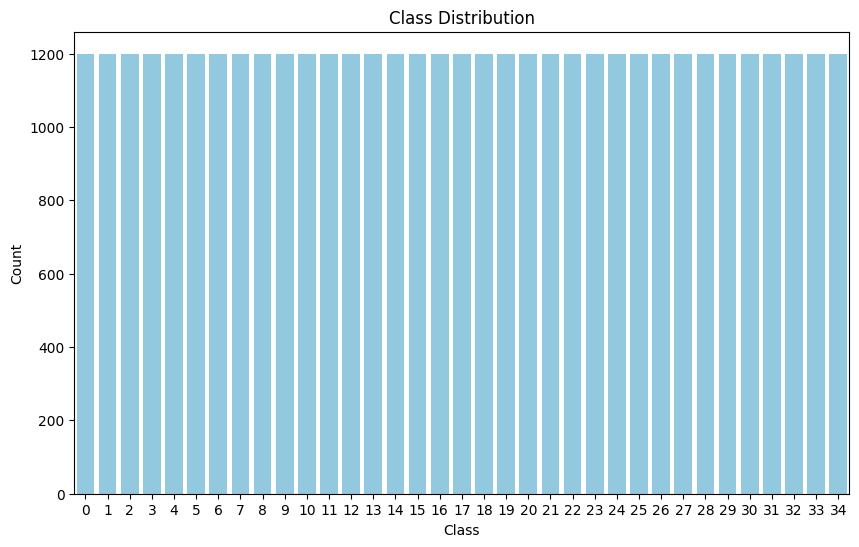

In [3]:
import os
import shutil
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import torchvision
from torchvision import transforms

# Define paths
source_dir = "IndianSignLanguage/data"
target_dir = "IndianSignLanguage_processed"

# Create target directory if it doesn't exist
if not os.path.exists(target_dir):
    os.makedirs(target_dir)

# Define classes to keep (adjust as needed for your dataset)
# Here, classes can be set as specific folder names you want to keep.
classes_to_keep = os.listdir(source_dir)  # Keeps all classes in the dataset

# Copy images of selected classes to the target directory
for class_name in classes_to_keep:
    src_path = os.path.join(source_dir, class_name)
    dst_path = os.path.join(target_dir, class_name)
    try:
        shutil.copytree(src_path, dst_path)
    except FileExistsError:
        print(f"Directory '{dst_path}' already exists. Skipping copying.")

# Dataset Paths
data_dir = target_dir

# Extract metadata
# Exploratory Analysis
print("Exploratory Analysis:")
metadata_df, class_distribution = extract_metadata(data_dir)

# Image transformations with data augmentation
transform = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
    transforms.RandomHorizontalFlip(),  # Random horizontal flip
    transforms.RandomVerticalFlip(),
    transforms.RandomRotation(10),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

# Load dataset with augmented transform
dataset = torchvision.datasets.ImageFolder(root=data_dir, transform=transform)

# Convert to DataFrame
df = pd.DataFrame(dataset.imgs, columns=['image_path', 'label'])

# Distribution Graphs
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='label', color='skyblue')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


In [4]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import random_split
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.preprocessing import StandardScaler
import numpy as np
import os
import pandas as pd
import cv2
from mpl_toolkits.mplot3d import Axes3D

In [5]:
# Set the random seed
# torch.manual_seed(42)
# Split dataset into train and test
train_size = int(0.7 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

# Create data loaders
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

In [6]:
import warnings
from sklearn.exceptions import UndefinedMetricWarning
# from sklearn.metrics import roc_curve, auc

# Suppress the warning
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

# Function to evaluate the model
def evaluate_model(model, test_loader):
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            all_preds.extend(predicted.numpy())
            all_labels.extend(labels.numpy())
    # return all_labels, all_preds
    # Calculate evaluation metrics
    # fpr, tpr, _ = roc_curve(all_labels, all_preds)
    # roc_auc = auc(fpr, tpr)
    precision = precision_score(all_labels, all_preds, average='weighted', zero_division='warn')
    recall = recall_score(all_labels, all_preds, average='weighted')
    f1 = f1_score(all_labels, all_preds, average='weighted')
    accuracy = accuracy_score(all_labels, all_preds)
    return accuracy, f1, recall, precision



In [7]:
train_size = int(0.7 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(dataset, [train_size, val_size])



# Print total number of images and total number of classes in train and validation sets
print("Total number of images in train set:", len(train_dataset))
print("Total number of images in validation set:", len(val_dataset))
# Print labels of classes selected

Total number of images in train set: 29399
Total number of images in validation set: 12601


In [8]:
import torch.nn as nn
import torch.nn.functional as F

class LeNet5(nn.Module):
    def __init__(self, num_classes):
        super(LeNet5, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 6, kernel_size=5),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(6, 16, kernel_size=5),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.classifier = nn.Sequential(
            nn.Linear(16 * 5 * 5, 120),
            nn.ReLU(inplace=True),
            nn.Linear(120, 84),
            nn.ReLU(inplace=True),
            nn.Linear(84, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x

In [9]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import pandas as pd
import os
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Evaluate the model
def evaluate(model, test_loader):
    model.eval()
    true_labels = []
    pred_labels = []
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            true_labels.extend(labels.numpy())
            pred_labels.extend(predicted.numpy())
    return true_labels, pred_labels

# Initialize the model
model = LeNet5(num_classes=35)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Define data loaders for training and validation
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64)

# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * images.size(0)
    epoch_loss = running_loss / len(train_dataset)
    print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {epoch_loss:.4f}")
            # Evaluate the model
    # print("Evaluation on Test Data:")
    # acc, f1_val, recall_val, precision_val = evaluate_model(model, test_loader)  # Assuming test_loader is defined
    # Test the model on the validation set
    true_labels, pred_labels = evaluate(model, val_loader)

    # Calculate evaluation metrics
    precision_val = precision_score(true_labels, pred_labels, average='weighted')
    recall_val = recall_score(true_labels, pred_labels, average='weighted')
    f1_val = f1_score(true_labels, pred_labels, average='weighted')
    acc = accuracy_score(true_labels, pred_labels)

Epoch [1/10], Train Loss: 0.6945
Epoch [2/10], Train Loss: 0.0756
Epoch [3/10], Train Loss: 0.0354
Epoch [4/10], Train Loss: 0.0324
Epoch [5/10], Train Loss: 0.0176
Epoch [6/10], Train Loss: 0.0182
Epoch [7/10], Train Loss: 0.0034
Epoch [8/10], Train Loss: 0.0242
Epoch [9/10], Train Loss: 0.0059
Epoch [10/10], Train Loss: 0.0142


In [10]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

# Function to extract embeddings from your model
def extract_embeddings(model, dataloader):
    model.eval()
    embeddings = []
    labels = []
    with torch.no_grad():
        for inputs, target in dataloader:
            inputs = inputs
            outputs = model(inputs)
            embeddings.extend(outputs.cpu().numpy())
            labels.extend(target.cpu().numpy())  # Collect labels
    return embeddings, labels

train_embeddings, train_labels = extract_embeddings(model, train_loader)
test_embeddings, test_labels = extract_embeddings(model, val_loader)

all_embedding = np.concatenate([train_embeddings, test_embeddings], axis=0)
all_label = np.concatenate([train_labels, test_labels], axis=0)


<ipython-input-11-877c0bcf040a>:11: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(embeddings_2d[indices, 0], embeddings_2d[indices, 1], label=label, cmap='viridis')


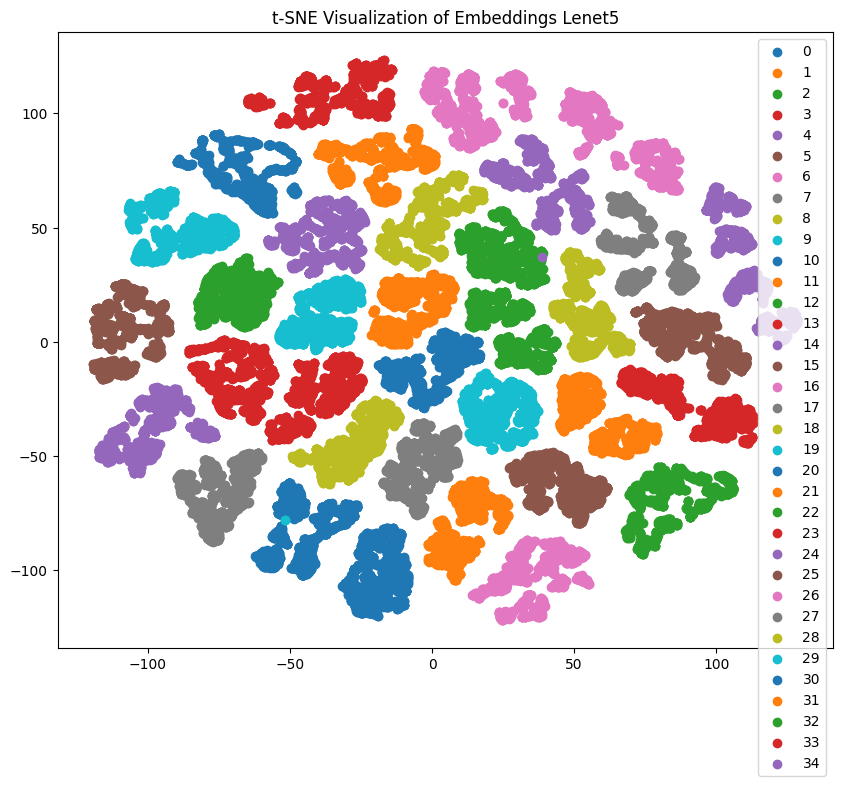

In [11]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Function to plot t-SNE embeddings
def plot_tsne(embeddings, labels, title):
    tsne = TSNE(n_components=2, random_state=42)
    embeddings_2d = tsne.fit_transform(embeddings)
    plt.figure(figsize=(10, 8))
    for label in set(labels):
        indices = labels == label
        plt.scatter(embeddings_2d[indices, 0], embeddings_2d[indices, 1], label=label, cmap='viridis')
    plt.title(title)
    plt.legend()
    plt.show()

# Plot t-SNE embeddings for all data
plot_tsne(all_embedding, all_label, title="t-SNE Visualization of Embeddings Lenet5")